# Factors Affecting the Success of Kickstarter Crowdfunding Projects
## by Gihan Mohamed Ahmed Ali

## Investigation Overview

> The goal of the presentation is to explore the determinants of kickstarter projects success and how these features affect the funds raised by these projects.

## Dataset Overview

>The current dataset is collected from Kickstarter websites and contains characeristics of 378,661 kickstarter project. After cleaning the dataset, there are 284826 kickstarter project in the dataset with 11 features ( 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'backers', 'country','usd pledged', 'usd_pledged_real', 'usd_goal_real','laun_year'). Some variables are numeric in nature and others are string, but the variables 'deadline', 'launched', and 'laun_year' are datetime.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
kickstarter = pd.read_csv("C:/Users/KIMOSTORE/ks-projects-2.csv")

In [5]:
# dropping columns that won't be analyzed
kickstarter = kickstarter.drop(['ID', 'name', 'goal', 'pledged', 'usd pledged'], axis=1)

In [6]:
#removing outliers
Q1 = kickstarter.quantile(0.25)
Q3 = kickstarter.quantile(0.75)
IQR = Q3 - Q1

kickstarter = kickstarter[~((kickstarter < (Q1 - 1.5 * IQR)) |(kickstarter > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
# convert 'launched' and 'deadline' features into date types and extracting month and year to new columns
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])
kickstarter['laun_year'] = kickstarter.launched.dt.year

In [8]:
# filtering out observations with launch date before 2009
((kickstarter['launched'])< '2009-01-01').index
kickstarter = kickstarter[(kickstarter['launched'].dt.year > 2008)]

In [9]:
# filtering out the project states that we are not concerned in predicting, namely; undefined, live, suspended

kickstarter = kickstarter[kickstarter["state"].isin(["canceled","failed", "successful"])]

In [10]:
# integrating canceled with failed state
kickstarter.loc[kickstarter.state.isin(['suspended', 'canceled']), 'state'] = 'failed'

## The Proportion of Successful and Failed Kickstarter Projects

> The majority of Kickstarter projects have failed or canceled (around 60%, and 10% repectively) while only 30% have succeeded

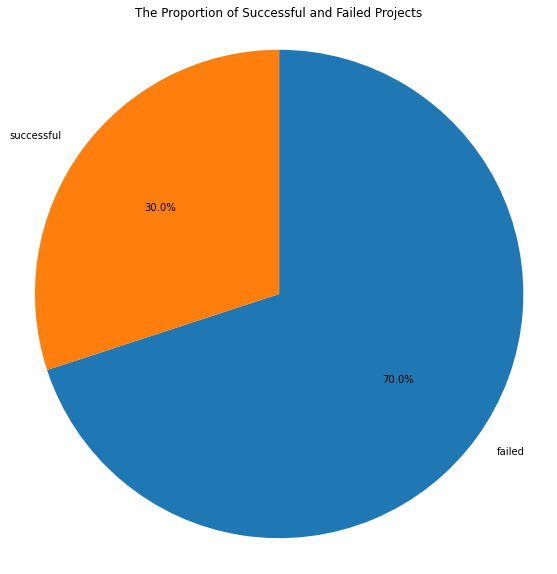

In [16]:
# plotting the relative proportion of different states
plt.figure(figsize = [20, 10]) 

sorted_counts = kickstarter['state'].value_counts() 
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square');
plt.title('The Proportion of Successful and Failed Projects');

## The Distribution of Crowdfunding Projects across Countries

> US account for more than 78% of all kickstarter projects, followed by Great Britian with 9% then Canada with 4%. While all other countries only have 7% of all kickstarter projects!

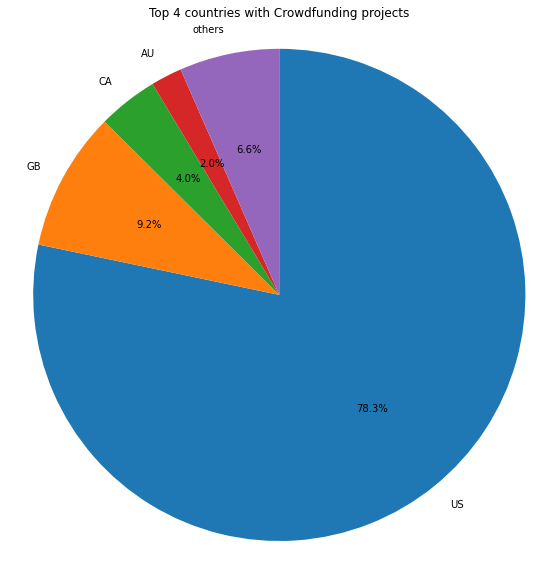

In [17]:
#The percentage distribution of the top 4 countries
plt.figure(figsize = [10, 10])

df = pd.DataFrame(
    data = {'country': kickstarter['country'].value_counts().index, 'value' :kickstarter['country'].value_counts()},
    ).sort_values('value', ascending = False)
#the top 4
df1 = df[:4].copy()

#others
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'value' : [df['value'][4:].sum()]
})

#combining top 4 with others
df2 = pd.concat([df1, new_row])


#plt.pie(df2, y = 'value', labels = df2['country'], autopct='%1.1f%%')
plt.pie(df2['value'], labels = df2['country'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Top 4 countries with Crowdfunding projects')
plt.show()

## The Correlation between the State of the Kickstarter Projects and various Numeric Features

> The first and second plots shows that the median number of backers and the median pledged amount are higher for successful projects as compared to failed/canceled projects. The third and fourth plots show that the goal amount and duration are negatively correlated with project success. Next, we shall look at the correlation between state and categories.

In [23]:
# creating a new feature for the duration set for the kickstarter project to raise the fund
kickstarter['duration'] = (kickstarter['deadline'] - kickstarter['launched']).dt.days
numeric_vars = ['backers', 'usd_pledged_real', 'usd_goal_real', 'duration']

<Figure size 1080x1080 with 0 Axes>

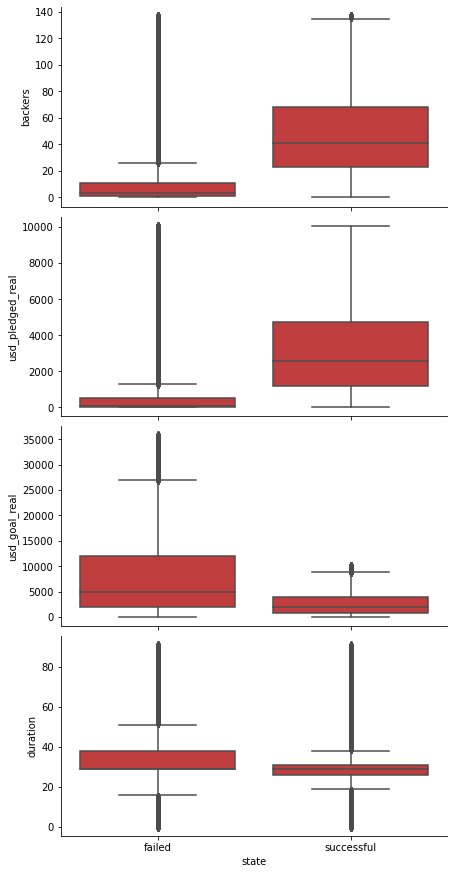

In [43]:
# the correlation between the numeric features and the state of the kickstarter projects
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[3]
    sb.boxplot(x, y, color = default_color);


plt.figure(figsize = [15, 15]);

g = sb.PairGrid(data = kickstarter, x_vars = ['state'], y_vars = numeric_vars,
                height = 3, aspect =2);
g.map(boxgrid);
plt.show();


## The State of The Top 20 Categories of Kickstarter Projects

> The Visual shows that the proportion of failed projects is higher than the successful projects in all top 20 sub-categories except for shorts, theater, Rock and Indi Rock. 

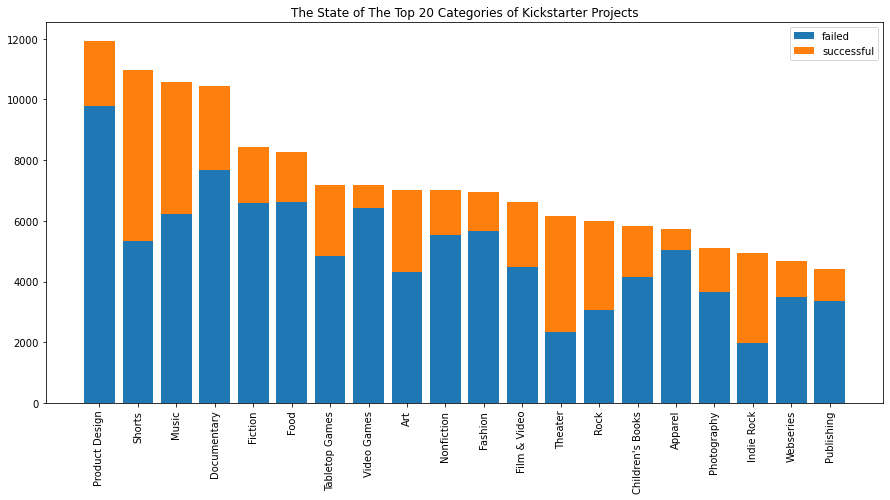

In [51]:
# The correlation between top 20 subcategories and the state of the kickstarter projects
plt.figure(figsize = [15, 7])
cat1_order = kickstarter['category'].value_counts().index[0:20]
cat2_order = kickstarter['state'].value_counts().index
baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = kickstarter[kickstarter['state'] == cat2]['category'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)
plt.xticks(rotation=90)
plt.title('The State of The Top 20 Categories of Kickstarter Projects');
plt.show()

## The Goal Amount and the Pledge Amount of Failed and Successful Projects across Years

> The first plot shows that the goal amount for the failed projects is always higher than that for the successful projects across years. Interestingly, the goal amount for succussful projects did not change significantly across years. As expected, the second plot shows that the pledge amount for failed projects is consistently lower than that of successful projects across years. Similarly, the pledge amount for successful projects did not change significantly across years. Overall, the figure shows that the kickstarters are too optimisitic when determining the goal amount which is relatively in a higher range than the actual pledged amount.

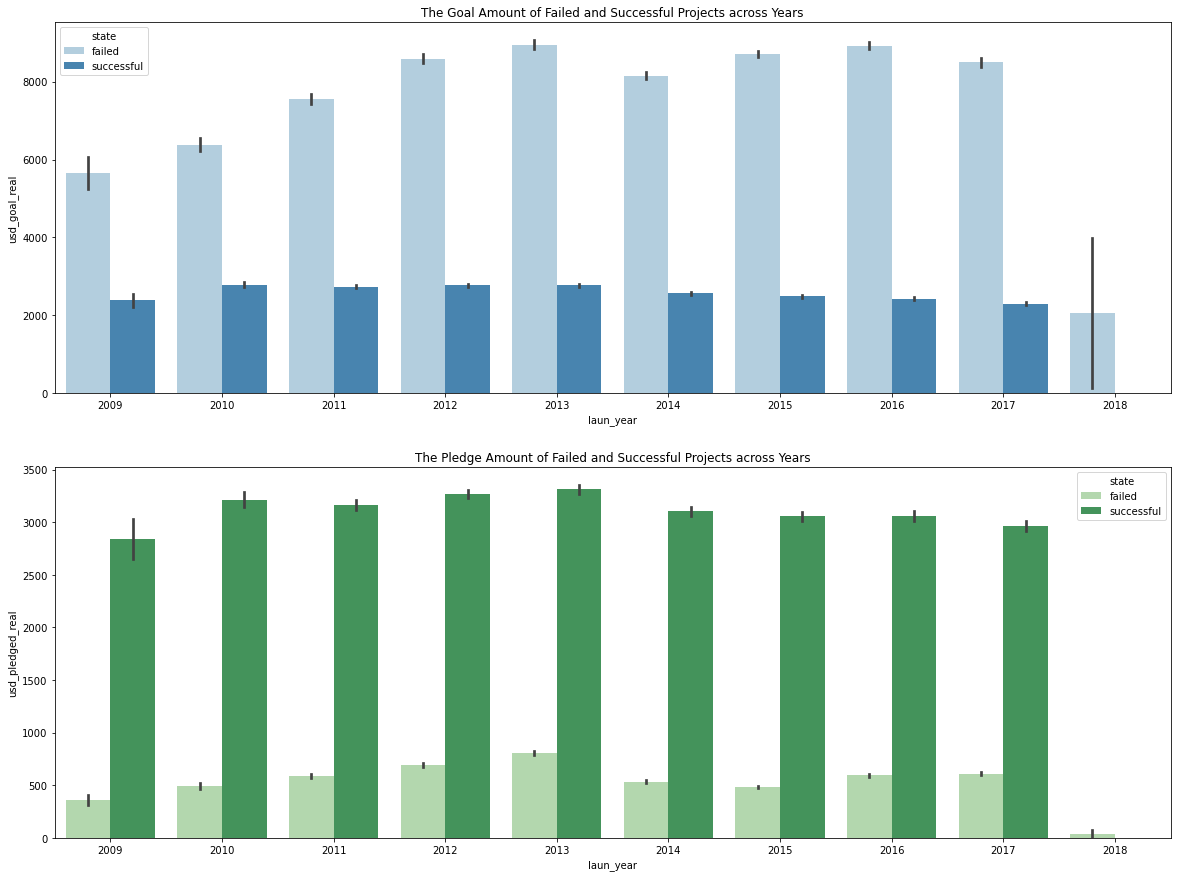

In [38]:
# How the goal amount and the pledge amount differs between failed and successful groups across years  
plt.figure(figsize = [20, 15])
plt.subplot(2, 1, 1)
sb.barplot(data = kickstarter, x = 'laun_year', y = 'usd_goal_real', hue = 'state', palette = 'Blues');
plt.title('The Goal Amount of Failed and Successful Projects across Years');

plt.subplot(2, 1, 2)
sb.barplot(data = kickstarter, x = 'laun_year', y = 'usd_pledged_real', hue = 'state', palette = 'Greens');
plt.title('The Pledge Amount of Failed and Successful Projects across Years');



## The Pledge Amount raised by top 10 Sub-categories and Main Categories of Kickstarter Projects

> The highest pledge amount raised by residencies in the Dance category which raised more than 2700 USD followed by Jazz in the music category which raised around 2500 USD. Four out of the top 10 fund raising categories fall in the Music class and three of them fall in the Dance class.

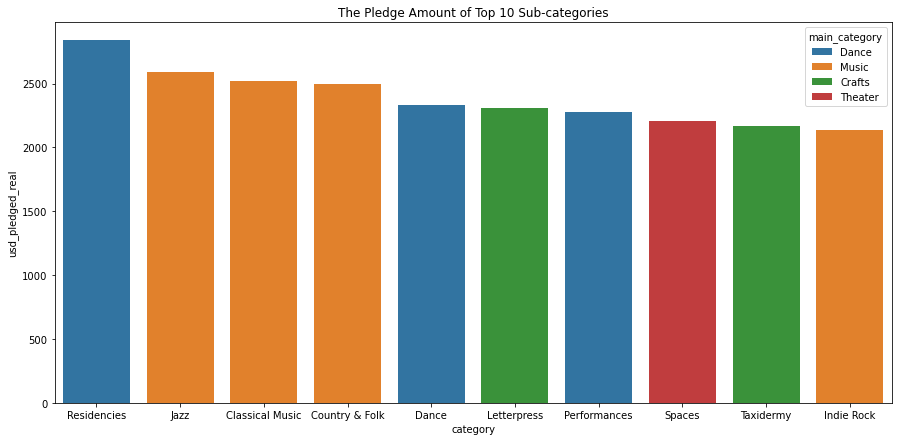

In [46]:
# The pledge amount raised by top 10 sub-categories and their respective categories
sub_cat = kickstarter.groupby(['category','main_category']).mean().sort_values("usd_pledged_real", ascending = False)[:10]
sub_cat.reset_index(inplace=True)

plt.figure(figsize = [15, 7])
sb.barplot(data = sub_cat, x = 'category', y = 'usd_pledged_real', hue = 'main_category', dodge = False);
plt.title('The Pledge Amount of Top 10 Sub-categories');

## The Average Fundraising Duration of Successful and Failed Projects across Categories
> The figure shows that the average duration of fundraising ranages from 27 to 35.7 days. Successful projects tend to take shorter duration where crafts category has the lowest average duration of 27 days and music catgory has the highest average duration of 32.5 days. Failed projects tend to take longer duration where Dance class takes the lowest average duration of 30.9 days and Music class takes the longest average duration of 35.8 days.

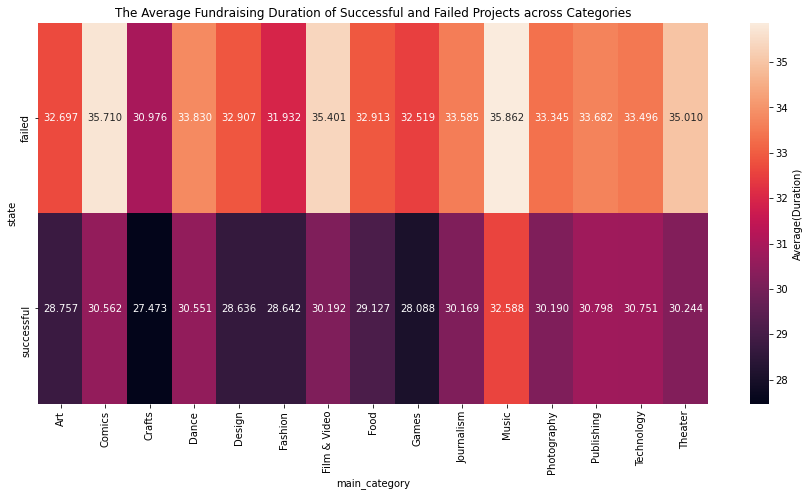

In [48]:
# The average duration of fundraising of successful and failed projects across categories
plt.figure(figsize = [15, 7])
cat_means = kickstarter.groupby(['main_category', 'state']).mean()['duration']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'state', columns = 'main_category',
                            values = 'duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Average(Duration)'});
plt.title('The Average Fundraising Duration of Successful and Failed Projects across Categories');